In [22]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [23]:
# For better visualization
sns.set(style="whitegrid")
%matplotlib inline

In [24]:
# Load the dataset
df = pd.read_csv("income dataset.csv")

This Dataset is a UCI Adult Income dataset (also known as the Census Income dataset) extracted from 1994 US Census data, used to predict whether an individual's annual income exceeds $50,000 based on demographic and employment features. It contains about 48,842 records.

In [20]:

# Inspect the dataset
print("First 5 rows:")
display(df.head())

First 5 rows:


,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [25]:
df.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [26]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [27]:
print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [28]:
print("\nCheck for missing values:")
display(df.isnull().sum())


Check for missing values:


age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [29]:
print("\nCheck for missing values:")
df.isnull().sum()


Check for missing values:


age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [30]:
# Explore categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
display(categorical_cols)

for col in categorical_cols:
    print(f"\n Value counts for {col}:")
    display(df[col].value_counts())


Categorical Columns:


Index(['JobType', 'EdType', 'maritalstatus', 'occupation', 'relationship',
       'race', 'gender', 'nativecountry', 'SalStat'],
      dtype='object')


 Value counts for JobType:


JobType
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64


 Value counts for EdType:


EdType
 HS-grad         10368
 Some-college     7187
 Bachelors        5210
 Masters          1674
 Assoc-voc        1366
 11th             1167
 Assoc-acdm       1055
 10th              921
 7th-8th           627
 Prof-school       559
 9th               506
 12th              417
 Doctorate         390
 5th-6th           318
 1st-4th           163
 Preschool          50
Name: count, dtype: int64


 Value counts for maritalstatus:


maritalstatus
 Married-civ-spouse       14692
 Never-married            10488
 Divorced                  4394
 Separated                 1005
 Widowed                    979
 Married-spouse-absent      397
 Married-AF-spouse           23
Name: count, dtype: int64


 Value counts for occupation:


occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: count, dtype: int64


 Value counts for relationship:


relationship
 Husband           12947
 Not-in-family      8156
 Own-child          5005
 Unmarried          3384
 Wife               1534
 Other-relative      952
Name: count, dtype: int64


 Value counts for race:


race
 White                 27430
 Black                  3028
 Asian-Pac-Islander      956
 Amer-Indian-Eskimo      311
 Other                   253
Name: count, dtype: int64


 Value counts for gender:


gender
 Male      21370
 Female    10608
Name: count, dtype: int64


 Value counts for nativecountry:


nativecountry
 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                 


 Value counts for SalStat:


SalStat
 less than or equal to 50,000    24283
 greater than 50,000              7695
Name: count, dtype: int64

In [31]:
# 4. Explore categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
display(categorical_cols)

for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    display(df[col].value_counts())


Categorical Columns:


Index(['JobType', 'EdType', 'maritalstatus', 'occupation', 'relationship',
       'race', 'gender', 'nativecountry', 'SalStat'],
      dtype='object')


Value counts for JobType:


JobType
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 ?                    1809
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64


Value counts for EdType:


EdType
 HS-grad         10368
 Some-college     7187
 Bachelors        5210
 Masters          1674
 Assoc-voc        1366
 11th             1167
 Assoc-acdm       1055
 10th              921
 7th-8th           627
 Prof-school       559
 9th               506
 12th              417
 Doctorate         390
 5th-6th           318
 1st-4th           163
 Preschool          50
Name: count, dtype: int64


Value counts for maritalstatus:


maritalstatus
 Married-civ-spouse       14692
 Never-married            10488
 Divorced                  4394
 Separated                 1005
 Widowed                    979
 Married-spouse-absent      397
 Married-AF-spouse           23
Name: count, dtype: int64


Value counts for occupation:


occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: count, dtype: int64


Value counts for relationship:


relationship
 Husband           12947
 Not-in-family      8156
 Own-child          5005
 Unmarried          3384
 Wife               1534
 Other-relative      952
Name: count, dtype: int64


Value counts for race:


race
 White                 27430
 Black                  3028
 Asian-Pac-Islander      956
 Amer-Indian-Eskimo      311
 Other                   253
Name: count, dtype: int64


Value counts for gender:


gender
 Male      21370
 Female    10608
Name: count, dtype: int64


Value counts for nativecountry:


nativecountry
 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                 


Value counts for SalStat:


SalStat
 less than or equal to 50,000    24283
 greater than 50,000              7695
Name: count, dtype: int64

In [32]:
#  Visualize distributions of numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns
print("\nNumerical Columns:")
display(numerical_cols)


Numerical Columns:


Index(['age', 'capitalgain', 'capitalloss', 'hoursperweek'], dtype='object')

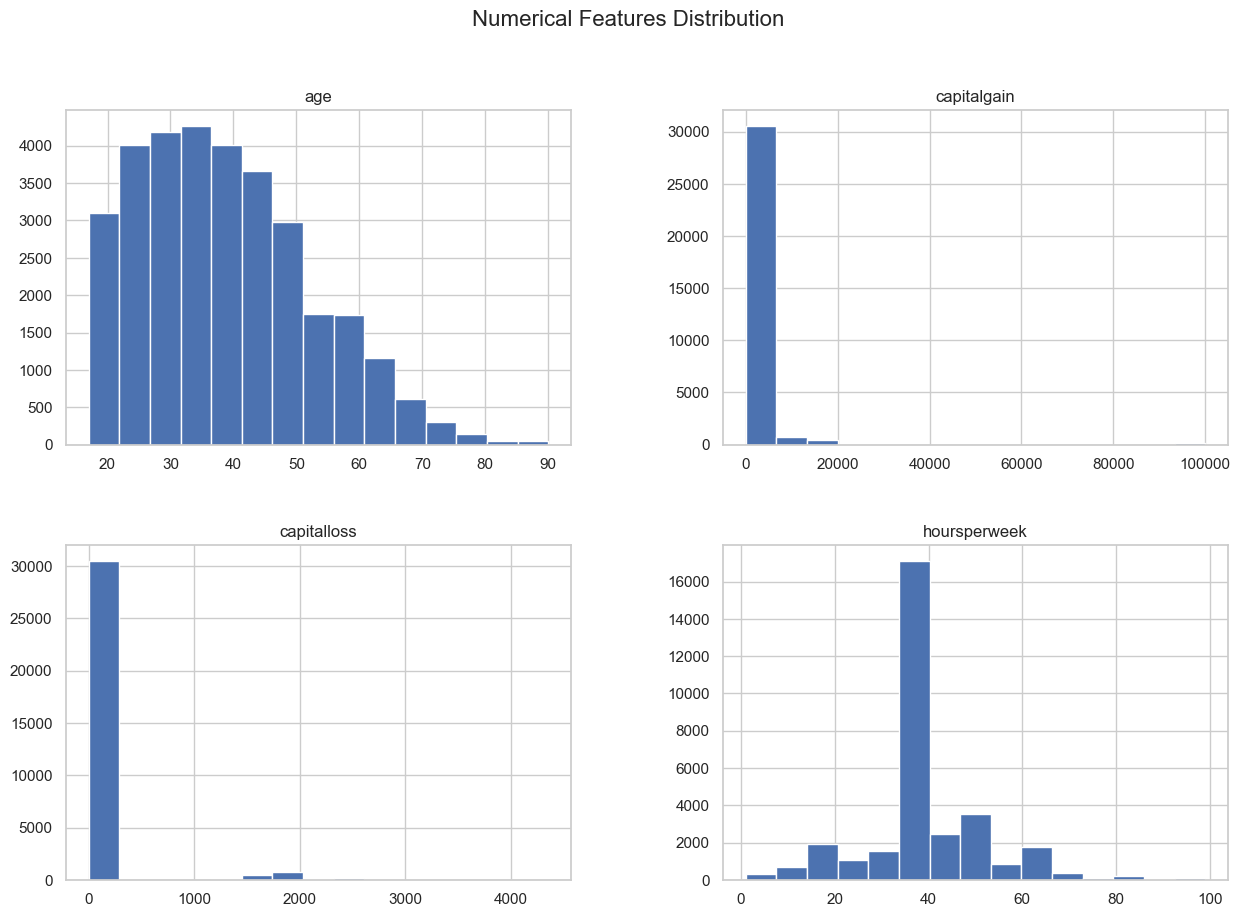

In [15]:

# Histograms
df[numerical_cols].hist(bins=15, figsize=(15,10), layout=(len(numerical_cols)//2, 2))
plt.suptitle("Numerical Features Distribution", fontsize=16)
plt.show()